In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
dir = "C:/Users/kmanj/Manjavacas Research/Tannock_2021/"
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Tannock_2021/"

In [3]:
Reference = 'Tannock et al 2021 AJ 161 224'
Telescope = 'Spitzer Space Telescope'
Object = [
    '2MASS J04070752+1546457',
    '2MASS J12195156+3128497',
    '2MASS J03480772-6022270'
]
SpectralType = [
    'L3.5',
    'L8',
    'T7'
]
Jmag = [
    '15.478 +/- 0.058',
    '15.913 +/- 0.082',
    '15.318 +/- 0.05'
]
Hmag = [
    '14.354 +/- 0.057',
    '14.907 +/- 0.074',
    '15.559 +/- 0.143'
]
Kmag = [
    '13.559 +/- 0.038',
    '14.305 +/- 0.072',
    '15.602 +/- 0.23'
] 
RA = [
    '61.78107710',
    '184.96467896',
    '57.03208946'
]
DEC = [
    '15.77961422',
    '31.48043520',
    '-60.37417905'
] 
Instrument = 'Spitzer/IRAC'
Date_obs_1 = '2015 Apr 26'
Date_obs_2 = '2015 Sep 16'
Date_obs_3 = '2015 Apr 22'
Band_obs_1 = 'Ch1 [3.6 microns]'
Band_obs_2 = 'Ch2 [4.5 microns]'
TSTART_1 = 57138.34068287
TSTOP_1 = 57139.16109954
TSTART_2 = 57134.22134259
TSTOP_2 = 57134.63042824
TSTART_3 = 57133.80976852
TSTOP_3 = 57134.21885417

In [4]:
data1 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS0407_ch1_data.txt", header = None, delimiter = '\t')
data2 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS0407_ch2_data.txt", header = None, delimiter = '\t')

In [5]:
for i in range(len(data1[3])):
    if data1[3][i] < 0:
        data1[3][i] = (-1) * data1[3][i]

for i in range(len(data2[3])):
    if data2[3][i] < 0:
        data2[3][i] = (-1) * data2[3][i]

In [6]:
#plt.errorbar(x = data1[0], y = data1[4], xerr = None, yerr = data1[3], fmt = '.', linewidth = 0.2)

In [7]:
#plt.errorbar(x = data2[0], y = data2[4], xerr = None, yerr = data2[3], fmt = '.', linewidth = 0.2)

In [8]:
lc = l.LightCurve(time = list(data1[0])*u.h, flux = list(data1[4]) * u.dimensionless_unscaled, flux_err = list(np.absolute(data1[3])) *u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J04070752+1546457_Ch1_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B36CE20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B42121D50>]

<Axes: xlabel='Time [JD]', ylabel='Flux'>

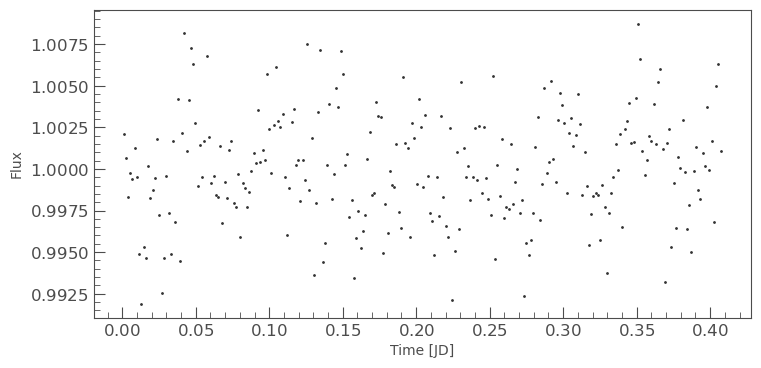

In [9]:
lc.scatter()

In [10]:
with fits.open(dir_save + '2MASS_J04070752+1546457_Ch1_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[0]
    f[0].header['SPECTYPE'] = SpectralType[0]
    f[0].header['TSTART'] = TSTART_1
    f[0].header['TSTOP'] = TSTOP_1
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[0]
    f[0].header['DEC_OBJ'] = DEC[0]
    f[0].header['JMAG'] = Jmag[0]
    f[0].header['HMAG'] = Hmag[0]
    f[0].header['KMAG'] = Kmag[0]

In [11]:
lc = l.LightCurve(time = list(data2[0]) * u.h, flux = list(data2[4]) * u.dimensionless_unscaled, flux_err = list(np.absolute(data2[3])) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J04070752+1546457_Ch2_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B8BEF80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B4B8BEB30>]

In [12]:
with fits.open(dir_save + '2MASS_J04070752+1546457_Ch2_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[0]
    f[0].header['SPECTYPE'] = SpectralType[0]
    f[0].header['TSTART'] = TSTART_1
    f[0].header['TSTOP'] = TSTOP_1
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[0]
    f[0].header['DEC_OBJ'] = DEC[0]
    f[0].header['JMAG'] = Jmag[0]
    f[0].header['HMAG'] = Hmag[0]
    f[0].header['KMAG'] = Kmag[0]

In [13]:
data3 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS1219_ch1_data.txt", header = None, delimiter = '\t')
data4 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS1219_ch2_data.txt", header = None, delimiter = '\t')

In [14]:
for i in range(len(data3[3])):
    if data3[3][i] < 0:
        data3[3][i] = (-1) * data3[3][i]

for i in range(len(data4[3])):
    if data4[3][i] < 0:
        data4[3][i] = (-1) * data4[3][i]

In [15]:
lc = l.LightCurve(time = list(data3[0])*u.h, flux = list(data3[4]) * u.dimensionless_unscaled, flux_err = list(np.absolute(data3[3])) *u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J12195156+3128497_Ch1_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B8F1990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B4B8BEDA0>]

In [16]:
with fits.open(dir_save + '2MASS_J12195156+3128497_Ch1_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[1]
    f[0].header['SPECTYPE'] = SpectralType[1]
    f[0].header['TSTART'] = TSTART_2
    f[0].header['TSTOP'] = TSTOP_2
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[1]
    f[0].header['DEC_OBJ'] = DEC[1]
    f[0].header['JMAG'] = Jmag[1]
    f[0].header['HMAG'] = Hmag[1]
    f[0].header['KMAG'] = Kmag[1]

In [17]:
lc = l.LightCurve(time = list(data4[0])*u.h, flux = list(data4[4]) *u.dimensionless_unscaled, flux_err = list(np.absolute(data4[3])) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J12195156+3128497_Ch2_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B82FE80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B4B82E290>]

In [18]:
with fits.open(dir_save + '2MASS_J12195156+3128497_Ch2_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[1]
    f[0].header['SPECTYPE'] = SpectralType[1]
    f[0].header['TSTART'] = TSTART_2
    f[0].header['TSTOP'] = TSTOP_2
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[1]
    f[0].header['DEC_OBJ'] = DEC[1]
    f[0].header['JMAG'] = Jmag[1]
    f[0].header['HMAG'] = Hmag[1]
    f[0].header['KMAG'] = Kmag[1]

In [19]:
data5 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS0348_ch1_data.txt", header = None, delimiter = '\t')
data6 = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Tannock_2021/2MASS0348_ch2_data.txt", header = None, delimiter = '\t')

In [20]:
lc = l.LightCurve(time = list(data5[0]) *u.h, flux = list(data5[4]) * u.dimensionless_unscaled, flux_err = list(np.absolute(data5[3])) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J03480772–6022270_Ch1_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B802380>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B4B1D1F60>]

In [21]:
with fits.open(dir_save + '2MASS_J03480772–6022270_Ch1_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[2]
    f[0].header['SPECTYPE'] = SpectralType[2]
    f[0].header['TSTART'] = TSTART_3
    f[0].header['TSTOP'] = TSTOP_3
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[2]
    f[0].header['DEC_OBJ'] = DEC[2]
    f[0].header['JMAG'] = Jmag[2]
    f[0].header['HMAG'] = Hmag[2]
    f[0].header['KMAG'] = Kmag[2]

In [22]:
lc = l.LightCurve(time = list(data6[0])*u.h, flux = list(data6[4]) * u.dimensionless_unscaled, flux_err = list(np.absolute(data6[3])) * u.dimensionless_unscaled)
lc.to_fits(dir_save + '2MASS_J03480772–6022270_Ch2_Tann2021.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000021B4B82D630>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000021B4B82E2F0>]

In [23]:
with fits.open(dir_save + '2MASS_J03480772–6022270_Ch2_Tann2021.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[2]
    f[0].header['SPECTYPE'] = SpectralType[2]
    f[0].header['TSTART'] = TSTART_3
    f[0].header['TSTOP'] = TSTOP_3
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA[2]
    f[0].header['DEC_OBJ'] = DEC[2]
    f[0].header['JMAG'] = Jmag[2]
    f[0].header['HMAG'] = Hmag[2]
    f[0].header['KMAG'] = Kmag[2]

In [24]:
lc1 = read_generic_lightcurve(dir_save + '2MASS_J03480772–6022270_Ch2_Tann2021.fits', time_format = 'mjd')

<Axes: xlabel='Time', ylabel='Flux'>

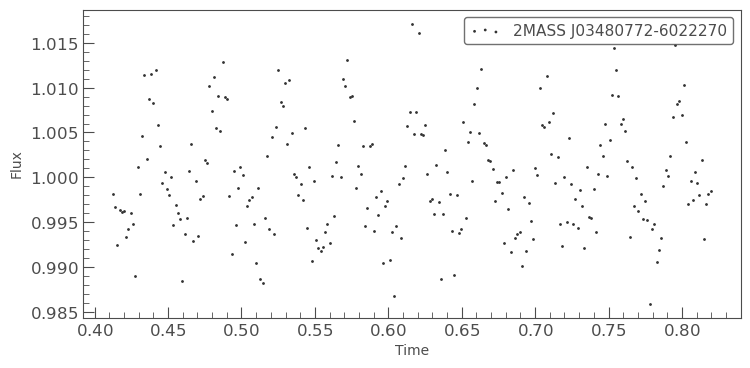

In [25]:
lc1.scatter()

In [26]:
dwarfs_files = os.listdir("C:/Users/kmanj/FITS_BD_Files/Data/Tannock_2021/")
dwarf_dat = [archive for archive in dwarfs_files]
dwarf_dat

['2MASS_J03480772–6022270_Ch1_Tann2021.fits',
 '2MASS_J03480772–6022270_Ch2_Tann2021.fits',
 '2MASS_J04070752+1546457_Ch1_Tann2021.fits',
 '2MASS_J04070752+1546457_Ch2_Tann2021.fits',
 '2MASS_J12195156+3128497_Ch1_Tann2021.fits',
 '2MASS_J12195156+3128497_Ch2_Tann2021.fits']

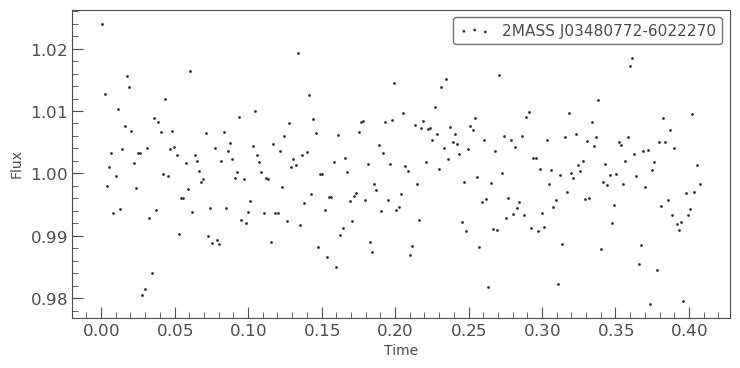

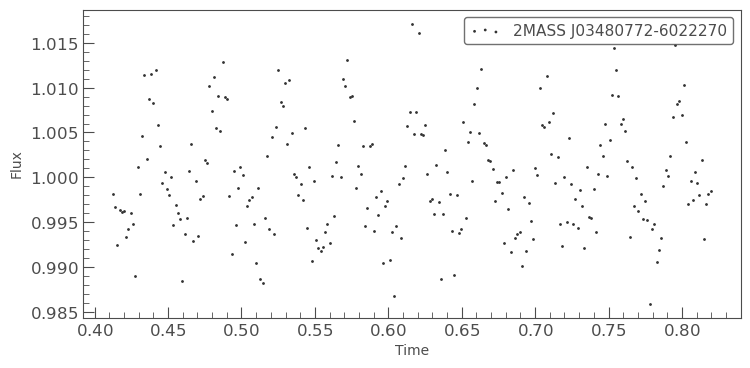

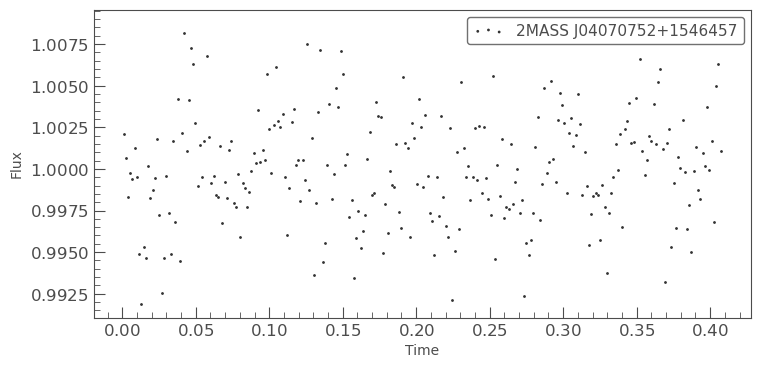

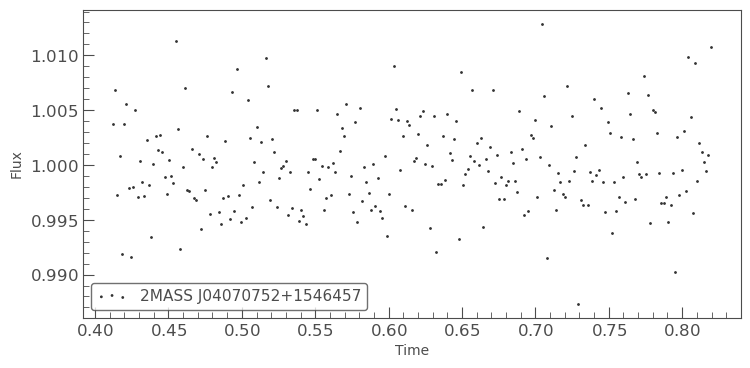

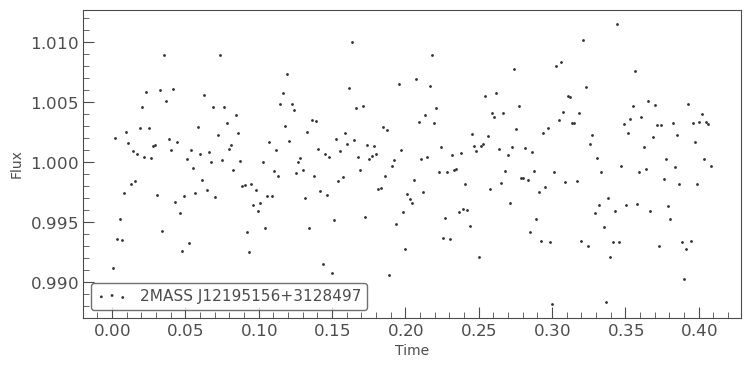

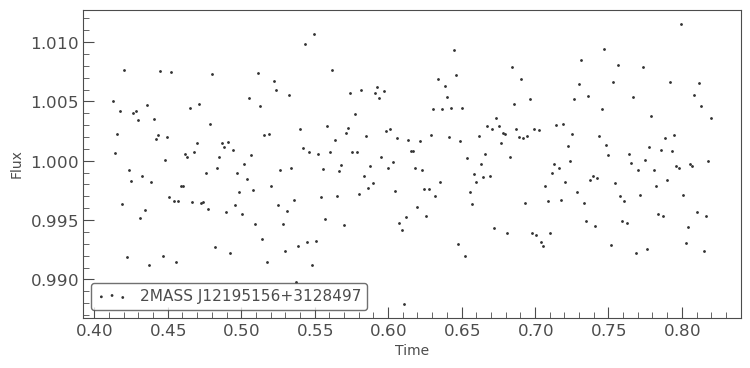

In [27]:
for i in dwarf_dat:
    lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Tannock_2021/"+i, time_format = 'mjd')
    lc.scatter()